In [2]:
pip install transformers torch datasets scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import pandas as pd
df = pd.read_csv('/content/UNBER-1k.csv')
df

,reel_id,UnsafeType,Visual texts
0,www.facebook.com/reel/1000188341415358,Safe,Me on my way to watch Oppenheimer After Berbie
1,www.facebook.com/reel/1006146964533997,Safe,NaN
2,www.facebook.com/reel/1007123741459823,Adult,বান্ধবী আমার লাগানির পিনিকে আছে Love in love
3,www.facebook.com/reel/1007420607202244,Safe,প্রত্যেকটা অফিসে এমন একজন কলিগ থাকবেই Laptop
4,www.facebook.com/reel/1008519870870927,Safe,হ্যালো শার্ক ট্যাঙ্ক বাংলাদেশ আই এম কামিং
...,...,...,...
1112,www.facebook.com/reel/946250977507282,Suicidal,কিছু কথা বাকি ছিল আর হয়তো কোনদিনও বলা হবে না
1113,www.facebook.com/reel/951238780033589,Suicidal,তোমাকে মন দিয়ে ভালোবাসতাম উপহার হিসাবে তোমার ক...
1114,www.facebook.com/reel/974520454682213,Suicidal,ওগো শুনছো একথা বলা মানুষটা আজ অন্য কারোর।
1115,www.facebook.com/reel/975204184253727,Suicidal,"মন দিয়ে ভালোবাসতে গেলাম, অবশেষে ধোকা পেলাম।"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reel_id       1117 non-null   object
 1   UnsafeType    1117 non-null   object
 2   Visual texts  739 non-null    object
dtypes: object(3)
memory usage: 26.3+ KB


In [5]:
df['Visual texts'] = df['Visual texts'].fillna("কোন টেক্সট পাওয়া যায়নি")
df

,reel_id,UnsafeType,Visual texts
0,www.facebook.com/reel/1000188341415358,Safe,Me on my way to watch Oppenheimer After Berbie
1,www.facebook.com/reel/1006146964533997,Safe,কোন টেক্সট পাওয়া যায়নি
2,www.facebook.com/reel/1007123741459823,Adult,বান্ধবী আমার লাগানির পিনিকে আছে Love in love
3,www.facebook.com/reel/1007420607202244,Safe,প্রত্যেকটা অফিসে এমন একজন কলিগ থাকবেই Laptop
4,www.facebook.com/reel/1008519870870927,Safe,হ্যালো শার্ক ট্যাঙ্ক বাংলাদেশ আই এম কামিং
...,...,...,...
1112,www.facebook.com/reel/946250977507282,Suicidal,কিছু কথা বাকি ছিল আর হয়তো কোনদিনও বলা হবে না
1113,www.facebook.com/reel/951238780033589,Suicidal,তোমাকে মন দিয়ে ভালোবাসতাম উপহার হিসাবে তোমার ক...
1114,www.facebook.com/reel/974520454682213,Suicidal,ওগো শুনছো একথা বলা মানুষটা আজ অন্য কারোর।
1115,www.facebook.com/reel/975204184253727,Suicidal,"মন দিয়ে ভালোবাসতে গেলাম, অবশেষে ধোকা পেলাম।"


In [6]:
df = df[['Visual texts', 'UnsafeType']]
df

,Visual texts,UnsafeType
0,Me on my way to watch Oppenheimer After Berbie,Safe
1,কোন টেক্সট পাওয়া যায়নি,Safe
2,বান্ধবী আমার লাগানির পিনিকে আছে Love in love,Adult
3,প্রত্যেকটা অফিসে এমন একজন কলিগ থাকবেই Laptop,Safe
4,হ্যালো শার্ক ট্যাঙ্ক বাংলাদেশ আই এম কামিং,Safe
...,...,...
1112,কিছু কথা বাকি ছিল আর হয়তো কোনদিনও বলা হবে না,Suicidal
1113,তোমাকে মন দিয়ে ভালোবাসতাম উপহার হিসাবে তোমার ক...,Suicidal
1114,ওগো শুনছো একথা বলা মানুষটা আজ অন্য কারোর।,Suicidal
1115,"মন দিয়ে ভালোবাসতে গেলাম, অবশেষে ধোকা পেলাম।",Suicidal


In [7]:
import random

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [8]:
df

,Visual texts,UnsafeType
0,"যাদের কথা আঘাত আমার রূহ পর্যন্ত পৌঁছে গেছে, তা...",Safe
1,তোমার ভাই আমার ভাই মোরসালিন ভাই মোরসালিন ভাই,Safe
2,বন্ধকে সান্তনা দিতে এসে nura,Adult
3,ইফতার করার পর বন্ধু শয়তান,Harmful
4,কল্পনারে স্বপ্ন সুন্দ্র বাস্তব এ না... পুরুষ ট...,Suicidal
...,...,...
1112,The Talking Bro,Safe
1113,কোন টেক্সট পাওয়া যায়নি,Safe
1114,ব্যর্থ প্রেম - Feeling sad. অনেক ধন্যবাদ তোমাক...,Suicidal
1115,তোমার জন্য আমি কেন্দে বেড়াতাম শেষ পর্যন্ত কান্...,Suicidal


In [9]:
df = df.rename(columns={'Visual texts': 'text', 'UnsafeType': 'label'})
df.head()

,text,label
0,"যাদের কথা আঘাত আমার রূহ পর্যন্ত পৌঁছে গেছে, তা...",Safe
1,তোমার ভাই আমার ভাই মোরসালিন ভাই মোরসালিন ভাই,Safe
2,বন্ধকে সান্তনা দিতে এসে nura,Adult
3,ইফতার করার পর বন্ধু শয়তান,Harmful
4,কল্পনারে স্বপ্ন সুন্দ্র বাস্তব এ না... পুরুষ ট...,Suicidal


In [10]:
df['label'].value_counts()

,count
label,
Safe,442
Adult,329
Harmful,221
Suicidal,125


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df['label'], uniques = pd.factorize(df['label'])
uniques

Index(['Safe', 'Adult', 'Harmful', 'Suicidal'], dtype='object')

In [13]:
df.head()

,text,label
0,"যাদের কথা আঘাত আমার রূহ পর্যন্ত পৌঁছে গেছে, তা...",0
1,তোমার ভাই আমার ভাই মোরসালিন ভাই মোরসালিন ভাই,0
2,বন্ধকে সান্তনা দিতে এসে nura,1
3,ইফতার করার পর বন্ধু শয়তান,2
4,কল্পনারে স্বপ্ন সুন্দ্র বাস্তব এ না... পুরুষ ট...,3


In [14]:
X = df['text']
y = df['label']

train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

test_texts, val_texts, test_labels, val_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels
)

In [15]:
from transformers import AutoTokenizer

# Load the tokenizer (you can use 'bert-base-multilingual-cased', 'xlm-roberta-base', or 'csebuetnlp/banglabert')
model_name = "csebuetnlp/banglabert"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize datasets
def tokenize_data(texts, tokenizer, max_length=128):
    return tokenizer(
        list(texts),
        max_length=max_length,
        truncation=True,
        padding=True,
        return_tensors="pt"  # PyTorch tensors
    )

train_encodings = tokenize_data(train_texts, tokenizer)
val_encodings = tokenize_data(val_texts, tokenizer)
test_encodings = tokenize_data(test_texts, tokenizer)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [16]:
import torch
from datasets import Dataset

# Convert data into Hugging Face Dataset format
train_data = Dataset.from_dict({"text": train_texts.tolist(), "label": train_labels.tolist()})
val_data = Dataset.from_dict({"text": val_texts.tolist(), "label": val_labels.tolist()})
test_data = Dataset.from_dict({"text": test_texts.tolist(), "label": test_labels.tolist()})

In [17]:
def preprocess_function(examples):
    return tokenizer(
        examples['text'],
        padding=True,
        truncation=True,
        max_length=512,
)

In [18]:
train_data = train_data.map(preprocess_function, batched=True)
val_data = val_data.map(preprocess_function, batched=True)
test_data = test_data.map(preprocess_function, batched=True)

Map:   0%|          | 0/893 [00:00<?, ? examples/s]

Map:   0%|          | 0/112 [00:00<?, ? examples/s]

Map:   0%|          | 0/112 [00:00<?, ? examples/s]

In [19]:
train_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

In [20]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=4
)

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglabert and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
from transformers import TrainingArguments, EarlyStoppingCallback

In [22]:
training_args = TrainingArguments(
    output_dir="./ReelBBert",             # Directory to save results
    evaluation_strategy="epoch",       # Evaluate at the end of every epoch
    learning_rate=5e-5,                # Learning rate
    per_device_train_batch_size=16,    # Batch size for training
    per_device_eval_batch_size=16,     # Batch size for evaluation
    num_train_epochs=20,                # Number of epochs
    weight_decay=0.01,                 # Weight decay
    logging_dir="./logs",              # Directory for logging
    logging_steps=10,                  # Log every 10 steps
    save_strategy="epoch",             # Save model at each epoch
    load_best_model_at_end=True,       # Load the best model at the end
    metric_for_best_model="f1",        # Use F1 score to select the best model
    greater_is_better=True            # F1 score: Higher is better
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [23]:
pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.9 MB/s eta 0:00:00


In [24]:
import evaluate
import numpy as np

# Load metrics using the evaluate library
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

In [25]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    # Compute F1, precision, and recall
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")

    return {
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
    }

In [26]:
from transformers import Trainer

trainer = Trainer(
    model=model,                         # Pretrained model
    args=training_args,                  # Updated training arguments
    train_dataset=train_data,            # Training data
    eval_dataset=val_data,               # Validation data
    tokenizer=tokenizer,                 # Tokenizer
    compute_metrics=compute_metrics,      # Updated metrics function
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5)]
)

trainer.train()

<ipython-input-26-39d20a6bb021>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: arefinlabibndc19 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss,F1,Precision,Recall
1,1.123900,1.070058,0.407543,0.370132,0.455357
2,0.999000,1.226855,0.397073,0.537088,0.508929
3,0.774400,1.296205,0.406042,0.440688,0.500000
4,0.766100,1.369707,0.434504,0.447783,0.455357
5,0.519300,1.478312,0.460442,0.469678,0.508929
6,0.397100,1.802434,0.426553,0.443330,0.500000
7,0.457100,1.929453,0.483036,0.511694,0.500000
8,0.407700,1.998300,0.453512,0.462480,0.473214
9,0.373400,2.127651,0.425915,0.462612,0.500000
10,0.488600,2.170511,0.433240,0.457779,0.455357


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=672, training_loss=0.5997121228526036, metrics={'train_runtime': 1147.9336, 'train_samples_per_second': 15.558, 'train_steps_per_second': 0.976, 'total_flos': 2819548699508736.0, 'train_loss': 0.5997121228526036, 'epoch': 12.0})

In [27]:
from sklearn.metrics import classification_report

predictions = trainer.predict(test_data)
predicted_labels = np.argmax(predictions.predictions, axis=1)

print(classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.56      0.45      0.50        44
           1       0.48      0.73      0.58        33
           2       0.60      0.27      0.38        22
           3       0.69      0.85      0.76        13

    accuracy                           0.54       112
   macro avg       0.58      0.58      0.55       112
weighted avg       0.56      0.54      0.53       112



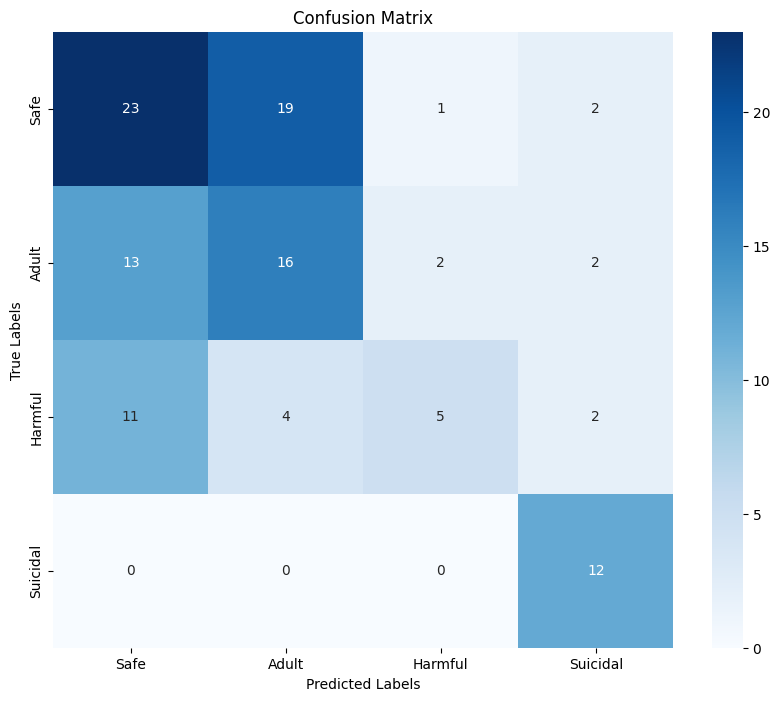

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = trainer.predict(val_data)
predicted_labels = np.argmax(predictions.predictions, axis=-1)
cm = confusion_matrix(val_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=uniques, yticklabels=uniques)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
trainer.save_model("/content/drive/MyDrive/SafeReels-664/Models/Text_models/ReelBBert")